# loading Required Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reading csv file

In [52]:
train=pd.read_csv("train.csv")

In [53]:
x=train.iloc[:,0]
y=train.iloc[:,1]

In [54]:
x

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
695    58.0
696    93.0
697    82.0
698    66.0
699    97.0
Name: x, Length: 700, dtype: float64

In [55]:
y

0      21.549452
1      47.464463
2      17.218656
3      36.586398
4      87.288984
         ...    
695    58.595006
696    94.625094
697    88.603770
698    63.648685
699    94.975266
Name: y, Length: 700, dtype: float64

In [56]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


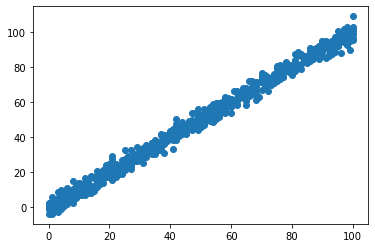

In [57]:
plt.scatter(x,y)

In [58]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

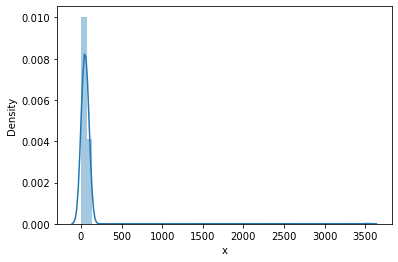

In [59]:
sns.distplot(x)


# Dropping outlier

In [60]:
drop=x.quantile(0.99)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

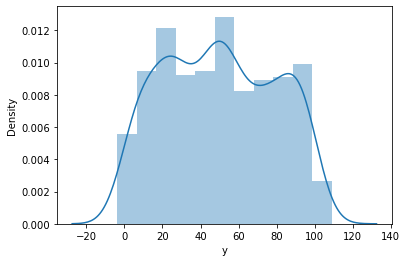

In [61]:
sns.distplot(y)

In [63]:
data=train[train['x']<drop]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

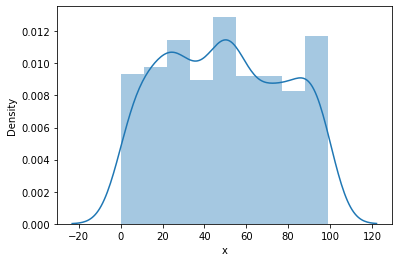

In [64]:
sns.distplot(data['x'])

# Scalling the data

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler1=StandardScaler()
scaler2=MinMaxScaler()

In [70]:
data=data.reset_index(drop=True)

In [87]:
x=data['x']
y=data['y']

In [78]:
x #x is series and scaler transform works on dataframe

0      24.0
1      50.0
2      15.0
3      38.0
4      87.0
       ... 
685    58.0
686    93.0
687    82.0
688    66.0
689    97.0
Name: x, Length: 690, dtype: float64

In [97]:

x=x.values  #so we convert x into array
y=y.values

In [98]:
y

array([ 21.54945196,  47.46446305,  17.21865634,  36.58639803,
        87.28898389,  32.46387493,  10.78089683,  80.7633986 ,
        24.61215147,   6.96331907,  11.23757338,  13.53290206,
        24.60323899,  39.40049976,  48.43753838,  61.69900319,
        26.92832418,  70.4052055 ,  29.34092408,  25.30895192,
        69.02934339,  84.99484703,  57.04310305,  50.5921991 ,
        83.02772202,  57.05752706,  47.95883341,  24.34226432,
        94.68488281,  48.03970696,   7.08132338,  21.99239907,
        42.33151664,   0.32908944,  61.92303698,  91.17716423,
        39.45358014,   5.99606961,  22.59015942,  61.18044414,
        85.02778957,  -1.28631089,  61.94273962,  21.96033347,
        33.66194193,  17.60946242,  58.5630564 ,  52.82390762,
        22.1363481 ,  35.07467353,  86.18822311,  42.63227697,
         4.09817744,  61.2229864 ,  17.70677576,  11.85312574,
        80.23051695,  62.64931741,   9.6168598 ,  20.02797699,
        61.7510743 ,  71.61010303,  23.77154623,  51.90

In [82]:
x

array([24., 50., 15., 38., 87., 36., 12., 81., 25.,  5., 16., 16., 24.,
       39., 54., 60., 26., 73., 29., 31., 68., 87., 58., 54., 84., 58.,
       49., 20., 90., 48.,  4., 25., 42.,  0., 60., 93., 39.,  7., 21.,
       68., 84.,  0., 58., 19., 36., 19., 59., 51., 19., 33., 85., 44.,
        5., 59., 14.,  9., 75., 69., 10., 17., 58., 74., 21., 51., 19.,
       50., 24.,  0., 12., 75., 21., 64.,  5., 58., 32., 41.,  7.,  4.,
        5., 49., 90.,  3., 11., 32., 83., 25., 83., 26., 76., 95., 53.,
       77., 42., 25., 54., 55.,  0., 73., 35., 86., 90., 13., 46., 46.,
       32.,  8., 71., 28., 24., 56., 49., 79., 90., 89., 41., 27., 58.,
       26., 31., 70., 71., 39.,  7., 48., 56., 45., 41.,  3., 37., 24.,
       68., 47., 27., 68., 74., 95., 79., 21., 95., 54., 56., 80., 26.,
       25.,  8., 95., 94., 54.,  7., 99., 36., 48., 65., 42., 93., 86.,
       26., 51., 94.,  6., 24., 75.,  7., 53., 73., 16., 80., 77., 89.,
       80., 55., 19., 56., 47., 56.,  2., 82., 57., 44., 26., 52

In [99]:
x= scaler1.fit_transform(x.reshape(-1,1)) 
y=y.reshape(-1,1)

In [84]:
x

array([[-0.88836425],
       [ 0.02233602],
       [-1.20360664],
       [-0.39798718],
       [ 1.31833254],
       [-0.46804105],
       [-1.30868744],
       [ 1.10817094],
       [-0.85333731],
       [-1.55387598],
       [-1.16857971],
       [-1.16857971],
       [-0.88836425],
       [-0.36296025],
       [ 0.16244375],
       [ 0.37260535],
       [-0.81831038],
       [ 0.82795548],
       [-0.71322958],
       [-0.64317571],
       [ 0.65282081],
       [ 1.31833254],
       [ 0.30255148],
       [ 0.16244375],
       [ 1.21325174],
       [ 0.30255148],
       [-0.01269092],
       [-1.02847198],
       [ 1.42341334],
       [-0.04771785],
       [-1.58890291],
       [-0.85333731],
       [-0.25787945],
       [-1.72901064],
       [ 0.37260535],
       [ 1.52849414],
       [-0.36296025],
       [-1.48382211],
       [-0.99344505],
       [ 0.65282081],
       [ 1.21325174],
       [-1.72901064],
       [ 0.30255148],
       [-1.06349891],
       [-0.46804105],
       [-1

# Train test spliting of dataset

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [93]:
x_test.shape

(138,)

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
lr=LinearRegression()

In [134]:
lr.fit(x_train,y_train)

LinearRegression()

In [135]:
y_hat=lr.predict(x_train)

# Ploting actual value wrt predicted value

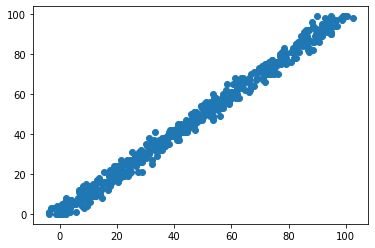

In [136]:
plt.scatter(y_train,y_hat)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

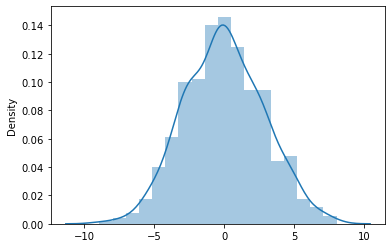

In [115]:
sns.distplot(y_train-y_hat)

In [116]:
lr.score(x_train,y_train)

0.9901776741048413

In [122]:
lr.score(x_test,y_test)

0.9914896148588552

In [128]:
coef=lr.coef_
intercept=lr.intercept_
ya=coef*x+intercept

In [133]:
len(ya)

690

# Plot of a best fit line along with Scattered data

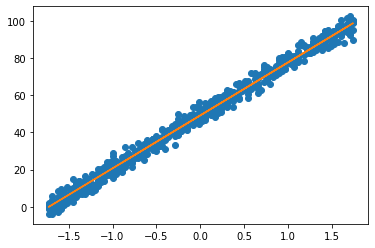

In [132]:
plt.plot(x, y, 'o')
plt.plot(x,ya)